# Introdução

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.

Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.

## Inicialização

In [1]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import numpy as np 

## Carregar dados

In [2]:
dados = pd.read_csv('/datasets/games.csv')

## Explore os dados iniciais

Descrição de dados:
- `Name` - (nome)
- `Platform` - (plataforma)
- `Year_of_Release` - (Ano de lançamento)
- `Genre` - (gênero)
- `NA_sales` - (vendas norte-americanas em milhões de USD)
- `EU_sales` - (vendas na Europa em milhões de USD)
- `JP_sales` - (vendas no Japão em milhões de USD)
- `Other_sales` - (vendas em outros países em em milhões de USD)
- `Critic_Score` - (Pontuação crítica) (máximo de 100)
- `User_Score` - (Pontuação do usuário) (máximo de 10)
- `Classificação` - (ESRB)

In [3]:
# Informações gerais/resumidas sobre o DataFrame
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- A colunas 'Name', 'Year_of_Release', 'Genre', 'Critical_Score', 'User_Score', 'Rating' possuem valores ausentes. 
- A coluna 'User_Score' deveria ser do tipo float. 
- A coluna 'Year_of_Release' deveria ser do tipo int.

In [4]:
# Amostragem dos dados
dados.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Verificando se há dados duplicados
dados.duplicated().sum()

0

Não há dados duplicados.

In [6]:
dados.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Preparar os dados

### Substituir nome das colunas

In [7]:
dados = dados.rename(columns={'Name': 'name',
                            'Platform': 'platform',
                            'Year_of_Release': 'year_of_release',
                            'Genre': 'genre',
                            'NA_sales': 'na_sales',
                            'EU_sales': 'eu_sales',
                            'JP_sales': 'jp_sales',
                            'Other_sales': 'other_sales',
                            'Critic_Score': 'critic_score',
                            'User_Score': 'user_score', 
                            'Rating': 'rating'})

In [8]:
#Conferindo se funcionou
dados.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Os nomes das colunas devem ser minúsculos.

### Corrigir tipo de dados

A coluna 'user_score' é de pontuação (0 a 10), portanto deve ser do tipo float. 

In [9]:
dados['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.5       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

A coluna possui 2424 valores 'tbd', mas essa coluna é de pontuação, deveriam ser apenas números, portanto ao transformar a coluna para o tipo float, colocarei o parâmetro errors='coerce', assim os valores que não são numéricos serão transformados em NaN, para tratá-los junto aos dados já ausentes.

In [10]:
dados['user_score'] = pd.to_numeric(dados['user_score'], errors='coerce')

In [11]:
dados['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [12]:
#Conferindo se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


A coluna year_of_release deve ser do tipo int, pois indica os anos de lançamento. Porém só consigo mudar para o tipo inteiro quando não existir mais valores NaN na coluna, então terei que primeiro tratar os dados ausentes.

### Corrigir dados ausentes

A coluna 'name' tem 2 valores ausentes, que vou substituir com 'unknown'.

In [13]:
dados['name'] = dados['name'].fillna('unknown')

In [14]:
#Conferindo se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Os dados ausentes foram preenchidos.

A coluna 'year_of_release' tem 16446 valores preenchidos, os ausentes vou preencher com a mediana.

In [16]:
df_med_year = dados.groupby(['platform']).agg({'year_of_release': 'median'})
dados['year_of_release'].fillna(dados.groupby(['platform'])['year_of_release'].transform('median'), inplace=True)

In [17]:
#Conferindo se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Agora que a coluna não possui mais dados NaN, posso mudar o tipo dela para int.

In [18]:
dados['year_of_release'] = dados['year_of_release'].astype('int')

In [19]:
#Conferindo se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


A coluna 'critic_score' também possui muitos valores ausentes.Vou preenchê-los com a mediana.

In [20]:
mediana_critic = dados['critic_score'].median()

In [21]:
dados['critic_score'] = dados['critic_score'].fillna(mediana_critic)

In [22]:
#Conferindo se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


A coluna 'genre' também possui 2 valores ausentes. Vou substituir com a moda.

In [23]:
mode_genre = dados['genre'].mode()
print(mode_genre)

0    Action
dtype: object


In [24]:
dados['genre'] = dados['genre'].fillna('Action')

In [25]:
#Conferindo se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


A coluna 'user_score' também possui muitos valores ausentes.Também vou preenchê-los com a mediana.

In [27]:
df_med = dados.groupby(['genre']).agg({'user_score': 'median'})
dados['user_score'].fillna(dados.groupby(['genre'])['user_score'].transform('median'), inplace=True)

In [28]:
#Conferindo se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


A coluna 'rating' também possui muitos valores ausentes. Vou preenchê-los com a moda.

In [29]:
mode_rating = dados['rating'].mode()
print(mode_rating)

0    E
dtype: object


In [30]:
dados['rating'] = dados['rating'].fillna('E')

In [31]:
#Conferindo se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Agora não há mais valores ausentes no dataframe e os tipos estão certos.

## Enriquecer dados

Irei calcular o total de vendas (a soma das vendas em todas as regiões) para cada jogo. 

In [28]:
def total(row):
    na = row['na_sales']
    eu = row['eu_sales']
    jp = row['jp_sales']
    other = row['other_sales']
    
    total = na + eu + jp + other
    return total

dados['total_sales'] = dados.apply(total, axis=1)

In [29]:
dados.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,E,31.38


## Análise dos dados

In [30]:
#Quantos jogos foram lançados em anos diferentes 
dados.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Entre 2002 e 2011 foi o período que mais lançaram jogos. A partir de 1994, o número de lançamentos teve um aumento significativo a cada ano.

Vamos ver como as vendas variam de plataforma para plataforma.

In [31]:
# Variação das vendas de plataforma para plataforma
dados.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

As plataformas com as maiores vendas totais são: PS2, X360, PS3, Wii, DS e PS.

Vou construir uma distribuição com base em dados para cada ano dessas plataformas com maiores vendas totais.

In [32]:
maiores_vendas = dados.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')

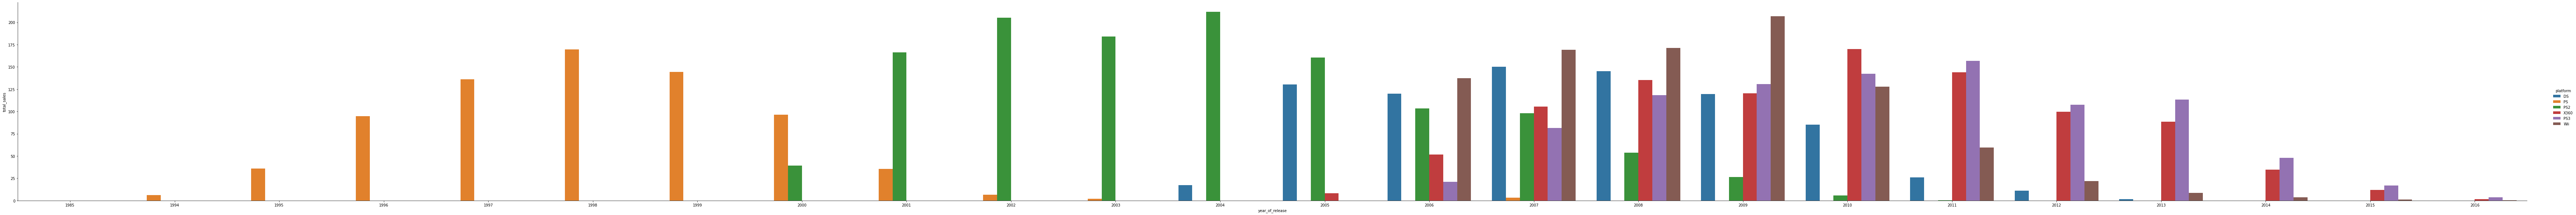

In [33]:
df_vendas = maiores_vendas.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
df_expl = df_vendas['total_sales'].reset_index()
sns.catplot(x='year_of_release', y='total_sales', hue='platform', data=df_expl, kind='bar', height = 8, aspect = 12)

Laranja: PS;
Azul: DS;
Verde: PS2;
Vermelho: X360;
Roxo: PS3;
Marrom: Wii

- O PS surge em 1994 e cresce sua popularidade até 1998, a partir desse ano,  sua popularidade diminuiu e desapareceu em 2004.
- De 2001 até 2005, a plataforma mais popular era o PS2. A partir de 2006 foi diminuindo sua popularidade e deixa de aparecer em 2011.
- O DS surge em 2004 e cresce sua popularidade até 2007, a partir desse ano vai perdendo a popularidade até deixar de aparecer em 2013.

Esses 3 foram os primeiros a surgir, e o tempo que levam para desaparecerem varia, sendo o PS2 o que mais demorou para desaparecer, 11 anos. O PS e o DS demoraram 9 anos. Essas plataformas costumavam ser populares, mas agora não têm vendas.

- O X360 surge em 2005 e sua popularidade cresce até 2010, a partir desse ano vai perdendo a popularidade, mas se mantém até esse ano (2016).
- O PS3 surge em 2006 e sua popularidade cresce até 2011, a partir desse ano vai perdendo a popularidade, mas se mantém até esse ano (2016).
- O Wii surge já com a maior popularidade em 2006 e sua popularidade cresce até 2009, a partir desse ano vai perdendo a popularidade, mas se mantém até esse ano (2016).

Analisando de 2000 a 2016 (período que apareceram mais de 1 plataforma com maiores vendas), levou de 3 a 5 anos para as novas plataformas aparecerem (X360, PS3 e Wii), desde o desaparecimento da primeira plataforma com mais vendas que surgiu (PS).

Vou analisar do período de 2000 a 2016, que foi o período que apareceram as plataformas com maiores vendas totais.

In [34]:
dados_16anos = dados.query('year_of_release in (2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016)')

Quais plataformas estão liderando em vendas?

In [35]:
lider_2016 = dados.query('year_of_release == 2016')
lider_2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

A plataforma que está liderando em vendas (2016) é a PS4, seguida da XOne e 3DS.

Quais plataformas estão crescendo ou diminuindo? (Vou analisar últimos 5 anos)

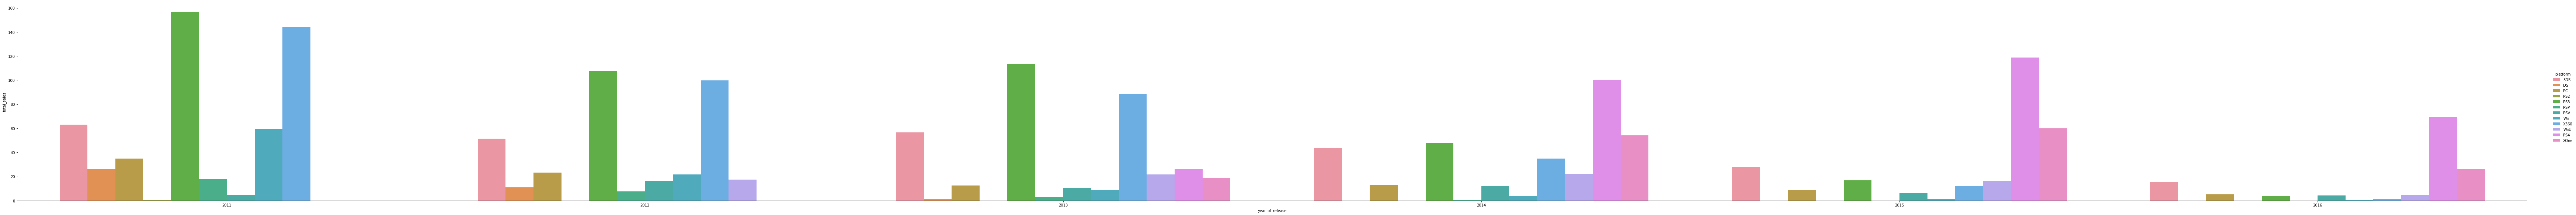

In [36]:
lider_5anos = dados.query('year_of_release in (2011, 2012, 2013, 2014, 2015, 2016)')
df_lider = lider_5anos.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
df_expl2 = df_lider['total_sales'].reset_index()
sns.catplot(x='year_of_release', y='total_sales', hue='platform', data=df_expl2, kind='bar', height = 8, aspect = 12)

Nos últimos 5 anos:
- 3DS só diminuiu, mas não desapareceu;
- DS se manteve até 2013 e desapareceu;
- PC só diminuiu, mas não desapareceu; 
- PS2 como vimos no gráfico anterior, desapareceu em 2012;
- PS3 só diminuiu, mas não desapareceu;
- PSP se manteve até 2014 e desapareceu; 
- PSV se manteve constante nesses anos
- Wii só diminuiu, mas não desapareceu totalmente;
- X360 só diminuiu, mas não desapareceu;
- WiiU surgiu em 2012, se manteve constante até 2015 e em 2016 diminuiu;
- PS4 surgiu em 2013, aumentou até 2015 e em 2016 diminuiu, mas é o líder em vendas;
- XOne surgiu em 2013, aumentou até 2015 e em 2016 diminuiu.

Nenhuma plataforma do ano anterior para esse (2016) está crescendo.
O restante das plataformas que não apareceram, significa que desapareceram antes de 2011.

Vamos ver as vendas globais de todos os jogos, divididos por plataforma

In [37]:
df_jogos = dados_16anos.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum' )

<AxesSubplot:>

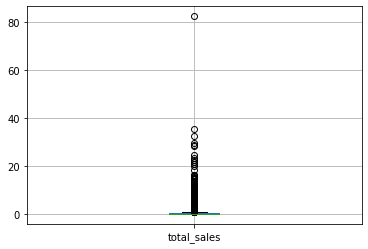

In [38]:
df_jogos.boxplot()

In [39]:
df_jogos.query('total_sales > 80')

,,total_sales
platform,name,
Wii,Wii Sports,82.54


Podemos ver que existem valores atípicos. Há uma diferença significativa em um jogo, que está acima de $80, o jogo 'Wii Sports'; o restante estão todos na faixa de 0 a 38. Apenas esse jogo possui venda total maior que o dobro dos outros, o que pode significar que ele vendeu muito mais que os outros, ou então é bem mais caro.

Vamos ver como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (PS4 - líder em vendas esse ano, 2016)

In [40]:
df_ps4 = dados.query('platform == "PS4"')

In [41]:
ps4 = df_ps4.pivot_table(index=['critic_score', 'user_score'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
print(ps4)

                         total_sales
critic_score user_score             
71.0         7.5               69.00
97.0         8.3               12.62
82.0         4.3                8.58
83.0         5.7                7.66
85.0         5.0                7.60
...                              ...
49.0         6.0                0.01
70.0         6.8                0.01
66.0         6.2                0.01
51.0         5.5                0.01
42.0         2.3                0.01

[235 rows x 1 columns]


Vemos que as maiores vendas provém de pontuações maiores de profissionais, sendo 71 a pontuação com maior venda; as próximas maiores vendas tem pontuação profissional maior que 80. No que diz respeito à pontuação dos usuários, não vemos tanta relação com as vendas.

In [42]:
df_ps4['critic_score'].corr(df_ps4['total_sales'])

0.3387064530024634

In [43]:
df_ps4['user_score'].corr(df_ps4['total_sales'])

-0.06275557891282788

Vemos que a pontuação profissional tem 33% de correlação com as vendas, enquanto a pontuação dos usuários tem correlação negativa de -6, ou seja, confirma o que foi analisado anteriormente.

Quais gêneros mais lucrativos?

In [44]:
dados.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

Os 3 gêneros mais lucrativos são: Action, Sports e Shooter

## Perfis para cada região

In [45]:
dados['na_sales'].sum()

4402.35

In [46]:
dados['eu_sales'].sum()

2424.67

In [47]:
dados['jp_sales'].sum()

1297.37

As vendas norte americanas são as maiores, seguidas das europeias e japonesas, nessa ordem, sendo uma quase o dobro da anterior.

Vamos ver as cinco plataformas principais por região.

In [48]:
dados.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
PS      336.52
GBA     187.54
XB      186.69
N64     139.02
GC      133.46
NES     125.94
GB      114.32
PSP     109.17
PS4     108.74
PC       94.53
XOne     93.12
2600     90.60
3DS      83.49
SNES     61.23
WiiU     38.10
GEN      21.05
PSV      12.58
DC        5.43
SCD       1.00
SAT       0.72
3DO       0.00
PCFX      0.00
NG        0.00
GG        0.00
TG16      0.00
WS        0.00
Name: na_sales, dtype: float64

In [49]:
dados.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
DS      188.89
PC      142.44
PS4     141.09
GBA      75.25
PSP      66.68
3DS      61.48
XB       60.95
XOne     51.59
GB       47.82
N64      41.06
GC       38.71
WiiU     25.13
NES      21.15
SNES     19.04
PSV      13.12
GEN       6.05
2600      5.47
DC        1.69
SAT       0.54
SCD       0.36
WS        0.00
TG16      0.00
PCFX      0.00
GG        0.00
3DO       0.00
NG        0.00
Name: eu_sales, dtype: float64

In [50]:
dados.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
NES      98.65
GB       85.12
PS3      80.19
PSP      76.78
Wii      69.33
GBA      47.33
N64      34.22
SAT      32.26
PSV      21.91
GC       21.58
PS4      15.96
WiiU     13.01
X360     12.43
DC        8.56
GEN       2.70
NG        1.44
WS        1.42
XB        1.38
SCD       0.45
XOne      0.34
PC        0.17
TG16      0.16
3DO       0.10
GG        0.04
PCFX      0.03
2600      0.00
Name: jp_sales, dtype: float64

As cinco principais plataformas nas regiões:
- Norte americana: X360, PS2, Wii, PS3 e DS;
- Europeia: PS2, PS3, X360, Wii, PS;
- Japonesa: DS, PS, PS2, SNES, 3DS

Os perfis norte americano e europeu possuem as mesmas plataformas como principais (apenas em ordem diferente), exceto por uma (DS e PS). O perfil japonês é o mais diferente, tendo em comum com as outras apenas o PS2 com a norte americana e PS2 e DS com a europeia.

Vamos ver os cinco principais gêneros por região

In [51]:
dados.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
Action          879.01
Sports          684.43
Shooter         592.24
Platform        445.50
Misc            407.27
Racing          359.35
Role-Playing    330.81
Fighting        223.36
Simulation      181.92
Puzzle          122.87
Adventure       105.26
Strategy         68.55
Name: na_sales, dtype: float64

In [52]:
dados.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
Action          519.13
Sports          376.79
Shooter         317.34
Racing          236.51
Misc            212.74
Platform        200.35
Role-Playing    188.71
Simulation      113.52
Fighting        100.33
Adventure        63.54
Puzzle           50.01
Strategy         45.17
Name: eu_sales, dtype: float64

In [53]:
dados.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Fighting         87.48
Simulation       63.80
Puzzle           57.31
Racing           56.71
Adventure        52.30
Strategy         49.66
Shooter          38.76
Name: jp_sales, dtype: float64

Os cinco principais gêneros nas regiões:

- Norte americana: Action, Sports, Shooter, Platform, Misc;
- Europeia: Action, Sports, Shooter, Racing, Misc;
- Japonesa: Role-PLaying, Action, Sports, Platform, Misc

Todos os perfis são parecidos, tendo em todos apenas um gênero diferente.

As classificações do ESRB afetam as vendas em regiões individuais?

In [54]:
dados.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
E       2535.45
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

In [55]:
dados.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
E       1324.08
M        483.97
T        427.03
E10+     188.52
AO         0.61
K-A        0.27
EC         0.11
RP         0.08
Name: eu_sales, dtype: float64

In [56]:
dados.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
E       1040.07
T        151.40
M         64.24
E10+      40.20
K-A        1.46
AO         0.00
EC         0.00
RP         0.00
Name: jp_sales, dtype: float64

A classificação E, T, M e E10+ são as que mais vendem nas 3 regiões, sendo a ordem da norte americana e da japonesa iguais; então a classificação afeta as regiôes de forma igual.

## Testando hipóteses

Nula: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Alternativa: contrária a nula, As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

In [57]:
xbox = dados.query('platform == "XOne"')
pc = dados.query('platform == "PC"')

In [58]:
xbox_clas = xbox['user_score']
pc_clas = pc['user_score']

Se as variâncias das populações estatísticas das quais as amostras são retiradas forem aproximadamente iguais equal_var=True; senão equal_var=False

In [59]:
xbox_clas.describe()

count    247.000000
mean       6.778947
std        1.260776
min        1.600000
25%        6.100000
50%        7.200000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [60]:
# Variância xbox
1.260776 * 1.260776

1.5895561221759997

In [61]:
pc_clas.describe()

count    974.000000
mean       7.154107
std        1.371767
min        1.400000
25%        6.700000
50%        7.500000
75%        8.000000
max        9.300000
Name: user_score, dtype: float64

In [62]:
1.371767 * 1.371767

1.881744702289

In [63]:
results = st.ttest_ind(xbox_clas, pc_clas)
print('p-value: ', results.pvalue)

p-value:  0.00010123955107193582


In [64]:
alpha = 0.05
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós rejeitamos a hipótese nula


Nós rejeitamos a hipótese que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas, elas são próximas, mas não são iguais.

Nula: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais. Alternativa: contrária a nula, as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [72]:
action = dados.query('genre == "Action"')
sports = dados.query('genre == "Sports"')
action_clas = action['user_score']
sports_clas = sports['user_score']

In [73]:
action_clas.describe()

count    3369.000000
mean        7.257762
std         1.073642
min         0.300000
25%         7.200000
50%         7.500000
75%         7.500000
max         9.500000
Name: user_score, dtype: float64

In [74]:
# Variância action
1.073642 * 1.073642

1.152707144164

In [75]:
sports_clas.describe()

count    2348.000000
mean        7.246891
std         1.136441
min         0.200000
25%         7.500000
50%         7.500000
75%         7.500000
max         9.500000
Name: user_score, dtype: float64

In [76]:
# Variância sports
1.136441 * 1.136441

1.291498146481

As variâncias são aproximadamente iguais.

In [84]:
results = st.ttest_ind(action_clas, sports_clas)
print('p-value: ', results.pvalue)
results = st.ttest_ind(action_clas, sports_clas)
print('p-value: ', results.pvalue)

p-value:  0.7131417795320426
p-value:  0.7159128316394157


In [85]:
alpha = 0.05
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós não podemos rejeitar a hipótese nula


Nós não podemos rejeitar a hipótese que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais.

## Conclusão Geral

Iniciei importando as bibliotecas pandas e seaborn e carregando o DataFrame com os dados sobre vendas de jogos.

Em seguida, o pré processamento dos dados, onde:
- Substitui os nomes das colunas, que estavam com letras maiúsculas, por letras minúsculas;
- Mudei o tipo de dados das colunas 'user_score' para o tipo float e a coluna 'year_of_release' para o tipo int;
- Não foram encontrados dados duplicados;
- A coluna 'name' possuia 2 valores ausentes, que substitui com 'unknown';
- Nas coluna 'year_of_release', 'user_score' e 'critic_score', preenchi os valores ausentes com a mediana;
- Na coluna 'rating', preenchi os valores ausentes com a moda;
- Para enriquecer o DataFrame, calculei o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloquei os resultados em uma nova coluna ('total_sales').

A partir disso, iniciei a análise:
- Vendo quantos jogos foram lançados em anos diferentes, percebemos que no período de 2002 a 2011 foram os anos que mais lançaram jogos, até pelo aumento da tecnologia e acesso dos usuários as plataformas. 
- Depois olhei a variação das vendas por plataforma e percebi que as com maiores vendas são PS2, X360, PS3, Wii, DS e PS. 
- As plataformas PS, DS e PS2 costumavam ser populares, e agora não tem mais vendas. Leva em torno de 9 a 11 anos paras as plataformas antigas desaparecerem e analisando no período de 2000 a 2016 (período que apareceram mais de 1 plataforma com maiores vendas) em torno de 3 a 5 anos para novas plataformas aparecem desde o desaparecimento da primeira plataforma com mais vendas que surgiu. 
- A plataforma que lidera em vendas nesse ano (2016) é a PS4. 
- Nos últimos 5 anos (2011 a 2016) não houveram plataformas que estão crescendo, apenas diminuindo ou se mantendo. 
- Sobre as vendas globais de todos os jogos, todos variam na faixa de 0 a 38, apenas o jogo “Wii Sports” está acima de 80, havendo uma diferença significativa entre ele e os outros jogos, o que pode significar que ele vendeu muito mais que os outros ou então é bem mais caro. 
- A respeito das avaliações, vemos que as maiores vendas provém de jogos com pontuações maiores de profissionais, havendo uma correlação de 33% com as vendas (não é uma correlação forte, mas existe); enquanto com a pontuação dos usuários há uma correlação negativa de -6, ou seja, quase nula. 
- Os gêneros mais lucrativos são: Action, Sports e Shooter. 

Sobre os perfis de cada região: 
- Norte americana é a que tem maiores vendas, seguida da europeia e japonesa, nessa ordem, sendo uma quase o dobro da anterior. 
- Em relação as 5 principais plataformas, a norte americana é parecida com a europeia, havendo diferença de apenas 1 plataforma, enquanto a japonesa é a mais diferente. 
- Em relação aos 5 principais gêneros, todos os perfis são parecidos, havendo diferença entre elas de apenas 1 gênero. 
- Em relação as classificações, elas afetam as regiões da mesma forma, sendo praticamente iguais em relação às vendas para cada região. 

Padrões que determinam se um jogo tem sucesso ou não:
- Jogos lançados entre 2000 e 2016, ou seja, mais modernos, tem maiores chances de sucesso, até porque os usuários passaram a ter mais acesso às plataformas, o que é comprovado também pelo aumento de lançamentos nesse período.
- Jogos com maiores pontuações de profissionais tendem a ter mais sucesso que outros.
- Jogos das plataformas mais conhecidas (PS2, PS3, PS4, Wii, X360 e DS) também tendem a ter mais sucesso.
- Jogos do gênero Action, Sports, Role-Playing,  Platform e Misc tendem a ter mais sucesso.

Sobre as hipóteses: 
- Nós rejeitamos a hipótese que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas, elas são próximas, mas não são iguais.
- Nós não podemos rejeitar a hipótese que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais. 
